In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Load Dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Understanding

In [3]:
# Cek Informasi Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Cek Missing Value
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Statistika Deskrptif
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


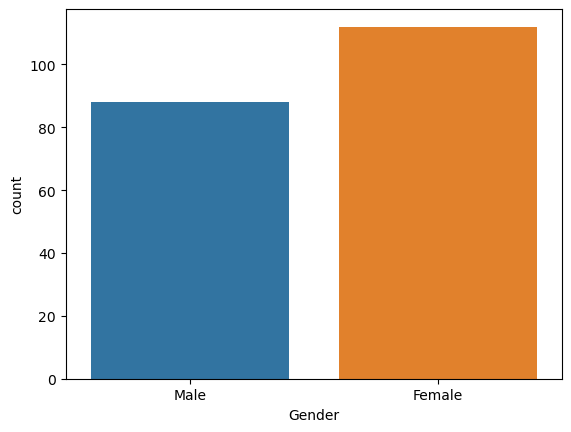

In [6]:
# Plot Gender
sns.countplot(x= data.Gender);

C:\Users\Selayanti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


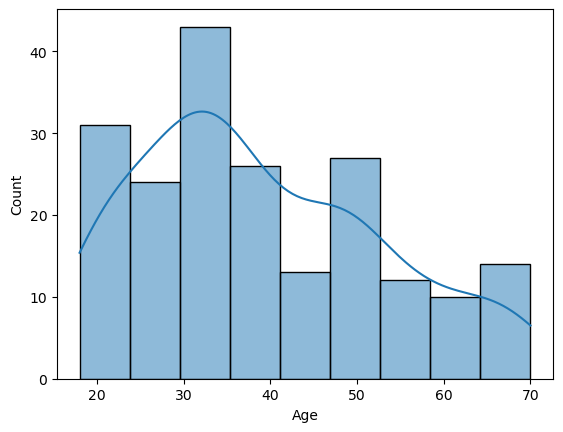

In [7]:
# Plot Age
sns.histplot(data.Age, kde=True);

C:\Users\Selayanti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


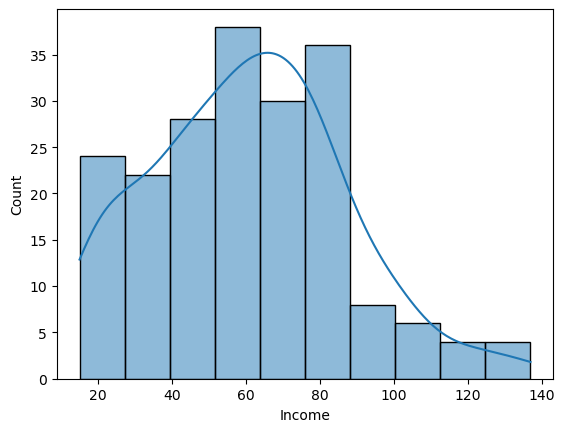

In [8]:
# Plot Annual Income (k$)
data.rename({'Annual Income (k$)': 'Income'}, axis =1, inplace = True)
sns.histplot(data.Income, kde=True);

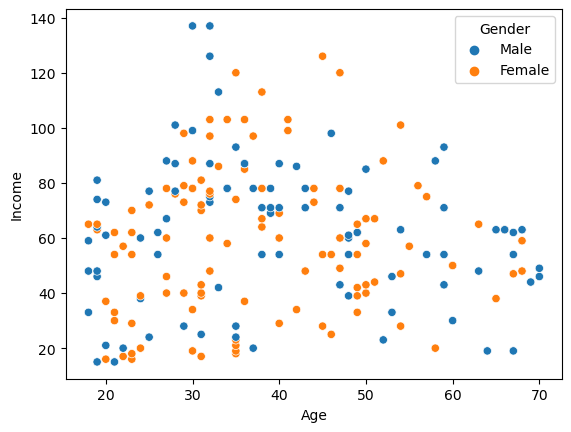

In [9]:
# hubungan antara usia (Age) dan pendapatan tahunan (Annual Income) dari pelanggan, dengan perbedaan warna untuk membedakan jenis kelamin (Gender) pelanggan

sns.scatterplot(y= data.Income, x= data.Age, hue= data.Gender);

C:\Users\Selayanti\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


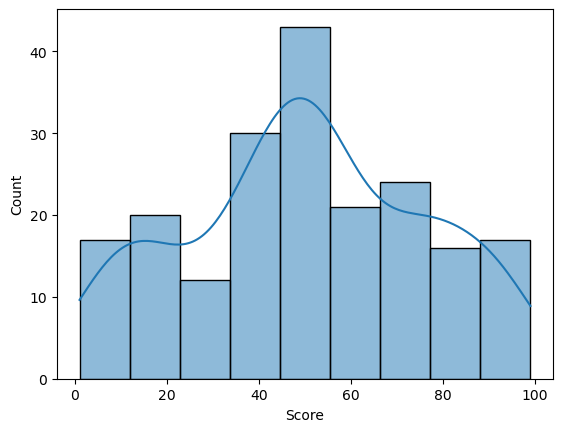

In [10]:
# Plot Spending Score (1-100)

data.rename({'Spending Score (1-100)': 'Score'}, axis =1, inplace = True)
sns.histplot(data.Score, kde=True);

# Hierarchical Clustering

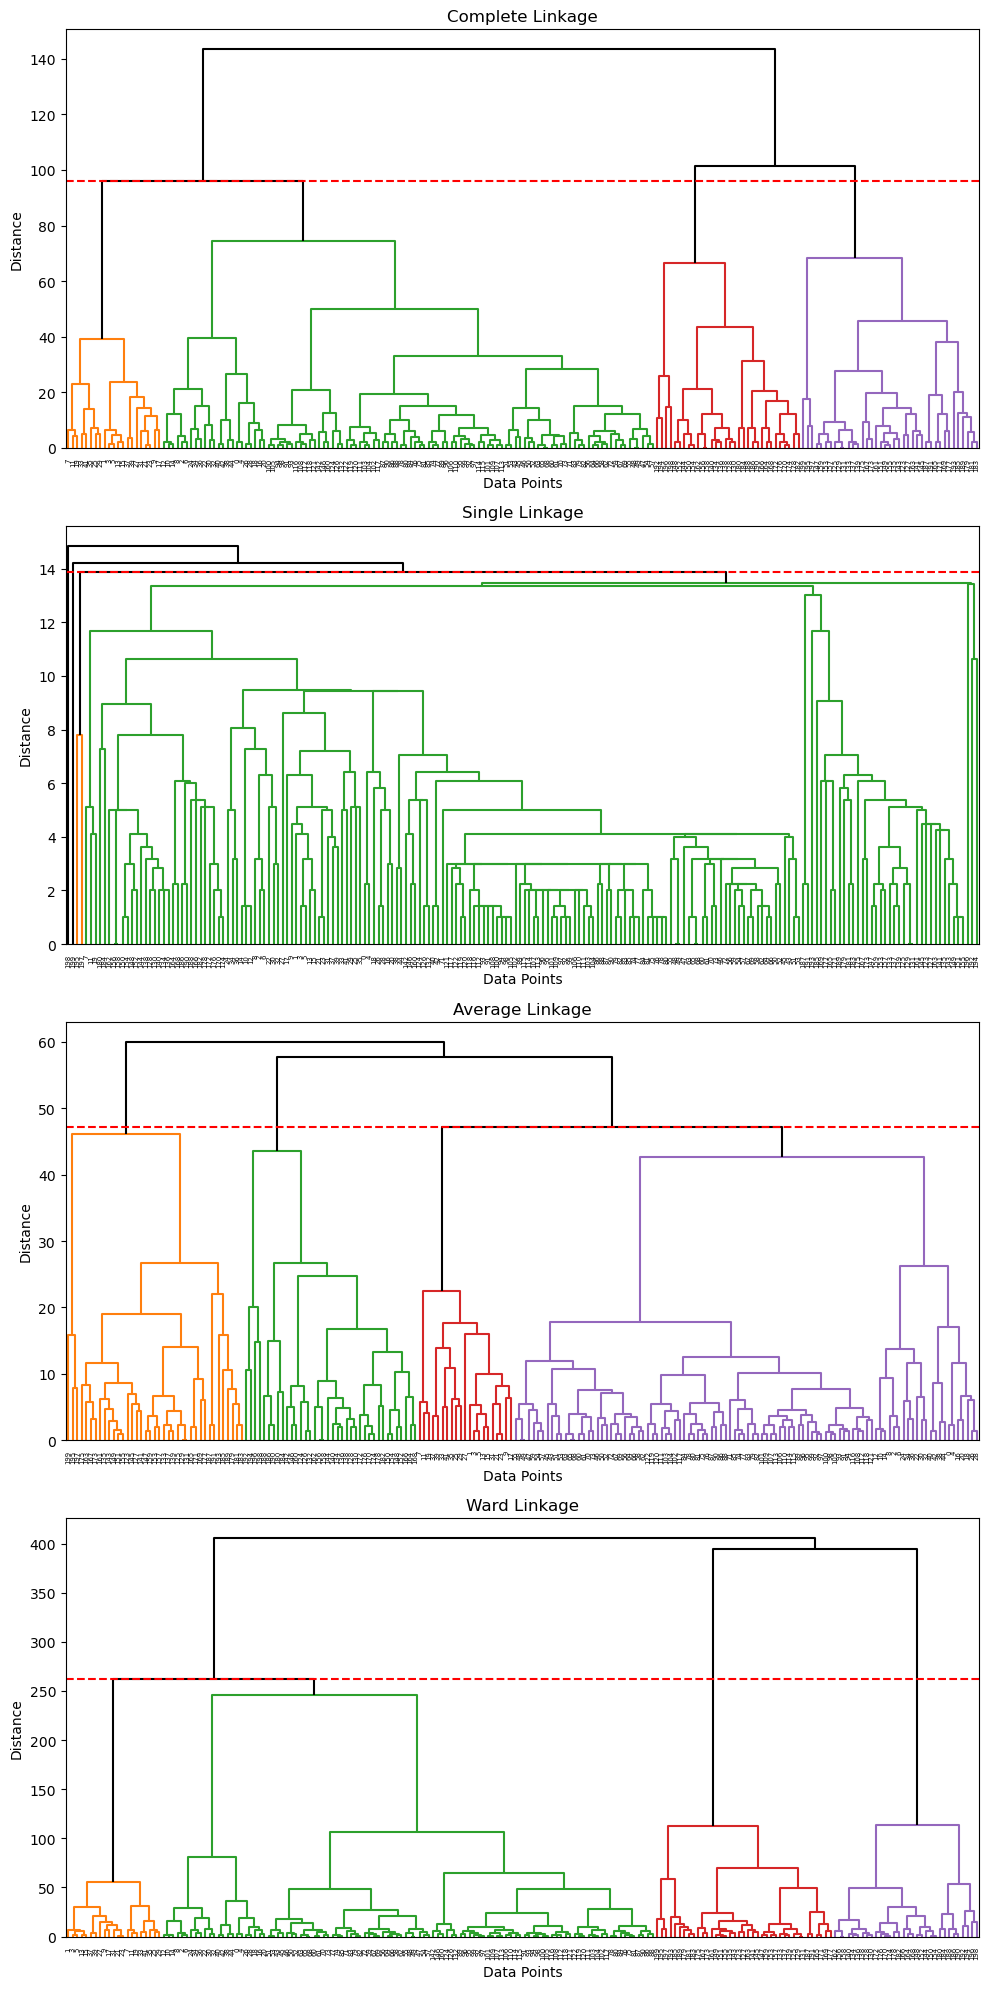

In [17]:
### 3 CLUSTERS ###

X= data[['Income', 'Score']].values

# Methods to compare
methods = ["complete", "single", "average", "ward"]
linkages = []

# Calculate linkage for each method
for method in methods:
    Z = linkage(X, method=method, metric="euclidean")
    linkages.append(Z)

# Plot dendrograms
fig, axs = plt.subplots(len(methods), 1, figsize=(10, 5 * len(methods)))

for i, method in enumerate(methods):
    dendrogram(
        linkages[i],
        ax=axs[i],
        color_threshold=linkages[i][-3, 2],  # Threshold to get 3 clusters
        above_threshold_color='k',  # Color above threshold
    )
    axs[i].axhline(y=linkages[i][-3, 2], color='r', linestyle='--')
    axs[i].set_title(f'{method.capitalize()} Linkage')
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

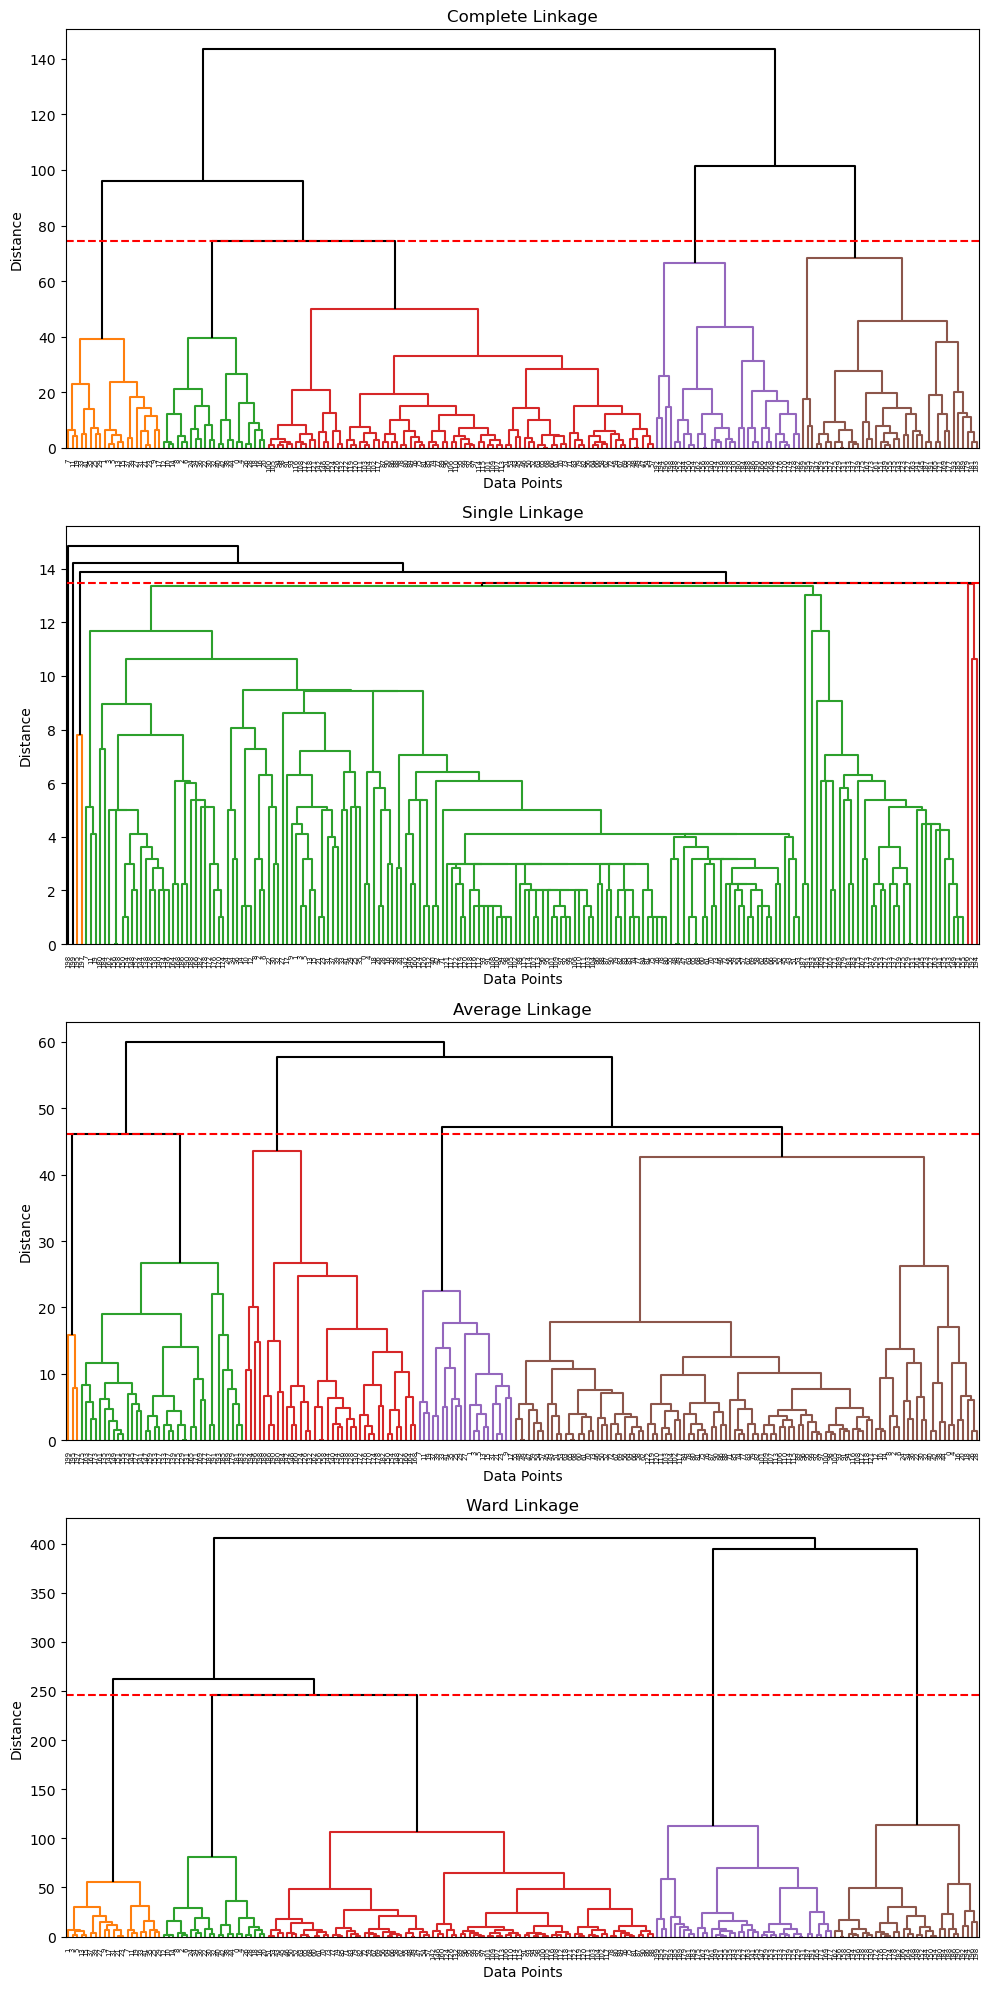

In [18]:
### 4 CLUSTERS ###

X= data[['Income', 'Score']].values

# Methods to compare
methods = ["complete", "single", "average", "ward"]
linkages = []

# Calculate linkage for each method
for method in methods:
    Z = linkage(X, method=method, metric="euclidean")
    linkages.append(Z)

# Plot dendrograms
fig, axs = plt.subplots(len(methods), 1, figsize=(10, 5 * len(methods)))

for i, method in enumerate(methods):
    dendrogram(
        linkages[i],
        ax=axs[i],
        color_threshold=linkages[i][-4, 2],  # Threshold to get 3 clusters
        above_threshold_color='k',  # Color above threshold
    )
    axs[i].axhline(y=linkages[i][-4, 2], color='r', linestyle='--')
    axs[i].set_title(f'{method.capitalize()} Linkage')
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

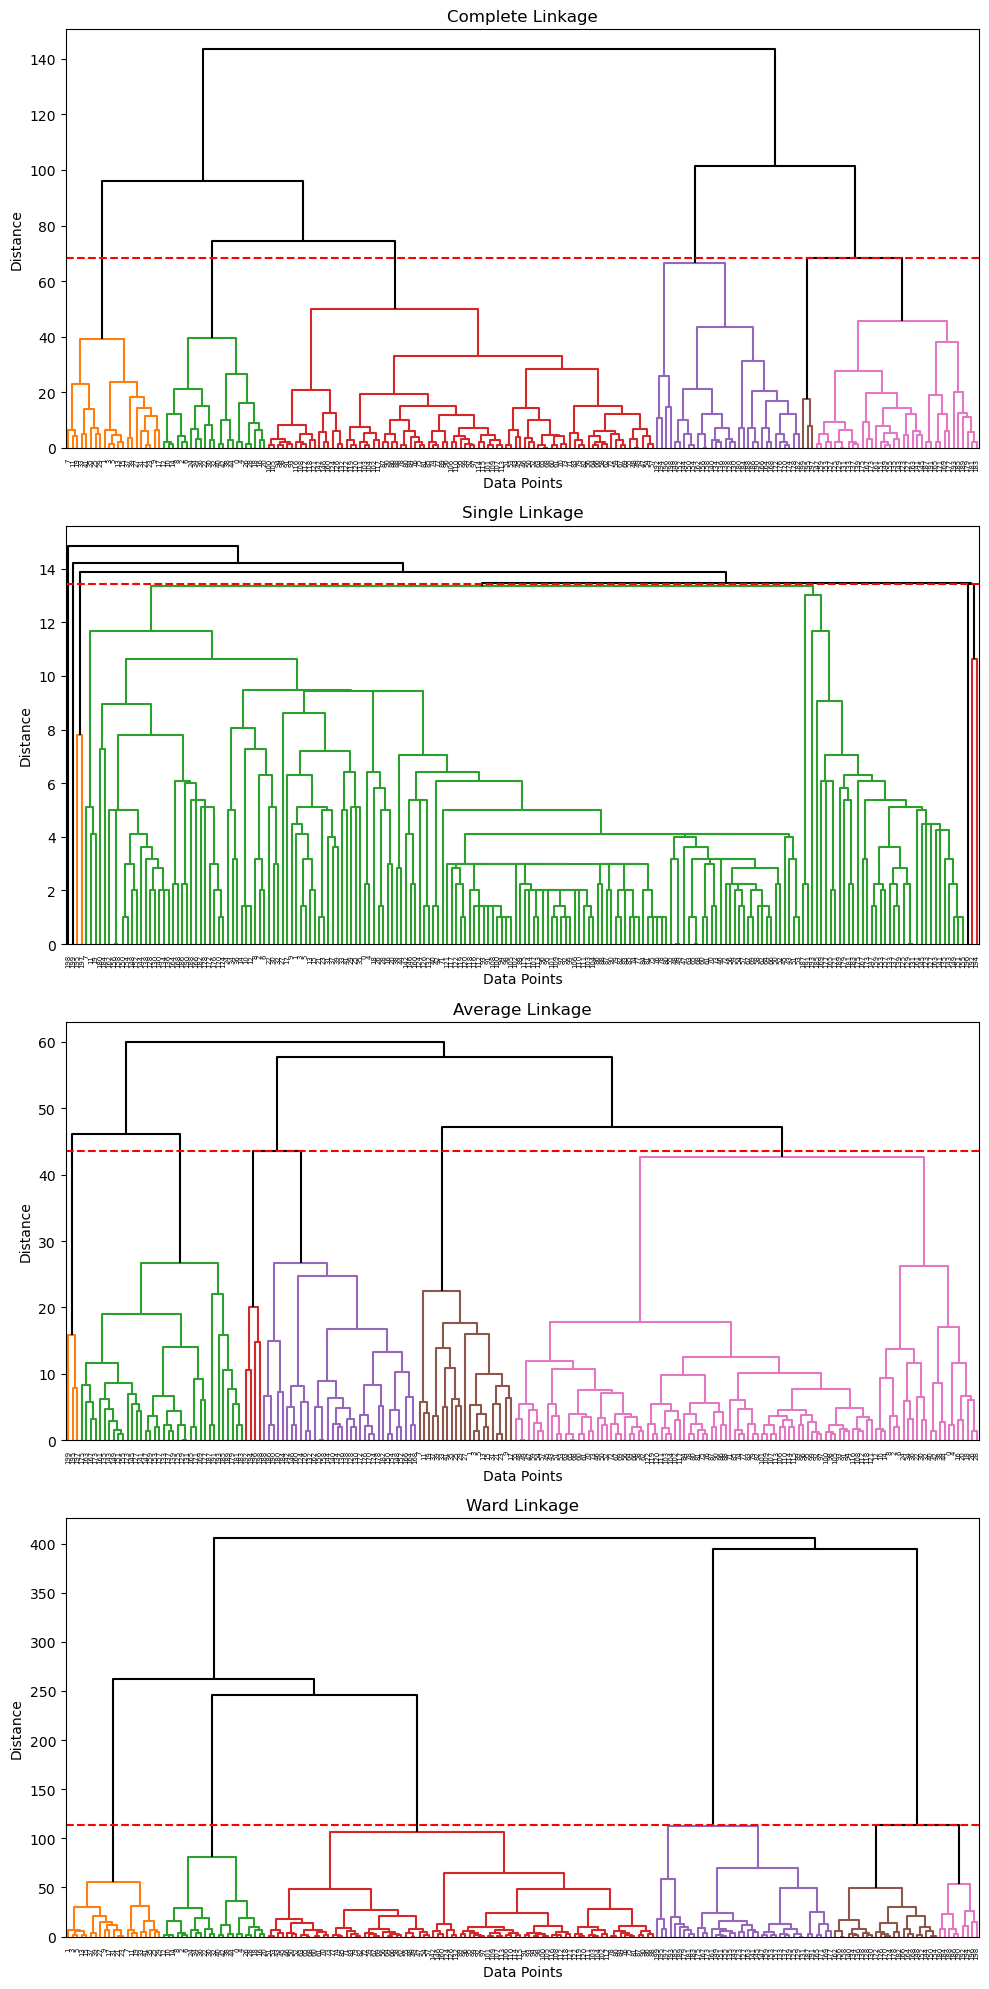

In [13]:
### 5 CLUSTERS ###

X= data[['Income', 'Score']].values

# Methods to compare
methods = ["complete", "single", "average", "ward"]
linkages = []

# Calculate linkage for each method
for method in methods:
    Z = linkage(X, method=method, metric="euclidean")
    linkages.append(Z)

# Plot dendrograms
fig, axs = plt.subplots(len(methods), 1, figsize=(10, 5 * len(methods)))

for i, method in enumerate(methods):
    dendrogram(
        linkages[i],
        ax=axs[i],
        color_threshold=linkages[i][-5, 2],  # Threshold to get 3 clusters
        above_threshold_color='k',  # Color above threshold
    )
    axs[i].axhline(y=linkages[i][-5, 2], color='r', linestyle='--')
    axs[i].set_title(f'{method.capitalize()} Linkage')
    axs[i].set_xlabel('Data Points')
    axs[i].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [14]:
# Fungsi untuk menghitung Pseudo-F Statistics
def pseudo_f_stats(X, labels):
    SST = np.sum((X - X.mean(axis=0))**2)
    SSW = 0
    for label in np.unique(labels):
        cluster = X[labels == label]
        SSW += np.sum((cluster - cluster.mean(axis=0))**2)
    SSB = SST - SSW
    R2 = SSB / SST
    pseudo_f = (R2 / (len(np.unique(labels)) - 1)) / ((1 - R2) / (len(X) - len(np.unique(labels))))
    return pseudo_f

# Fungsi untuk menghitung icdrate
def icdrate(X, labels):
    SST = np.sum((X - X.mean(axis=0))**2)
    SSW = 0
    for label in np.unique(labels):
        cluster = X[labels == label]
        SSW += np.sum((cluster - cluster.mean(axis=0))**2)
    R2 = 1 - (SSW / SST)
    return 1 - R2

# Mengambil data dari variabel X
X = data[['Income', 'Score']].values

# Membuat daftar untuk menyimpan hasil Pseudo-F Statistics dan icdrate
pseudo_f_scores = {}
icdrate_scores = {}

# Menghitung Pseudo-F Statistics dan icdrate untuk setiap metode dan jumlah cluster
for method in methods:
    pseudo_f_scores[method] = {}
    icdrate_scores[method] = {}
    for n_clusters in [3, 4, 5]:
        Z = linkage(X, method=method, metric="euclidean")
        labels = fcluster(Z, n_clusters, criterion='maxclust')
        pseudo_f = pseudo_f_stats(X, labels)
        icd = icdrate(X, labels)
        pseudo_f_scores[method][n_clusters] = pseudo_f
        icdrate_scores[method][n_clusters] = icd

# Menampilkan hasil Pseudo-F Statistics
print("Pseudo F-Statistics:")
for method in methods:
    print(f"{method.capitalize()} Linkage:")
    for n_clusters in [3, 4, 5]:
        print(f"    {n_clusters} clusters: {pseudo_f_scores[method][n_clusters]:.2f}")

# Menampilkan hasil icdrate
print("\nICD Rate:")
for method in methods:
    print(f"{method.capitalize()} Linkage:")
    for n_clusters in [3, 4, 5]:
        print(f"    {n_clusters} clusters: {icdrate_scores[method][n_clusters]:.2f}")

Pseudo F-Statistics:
Complete Linkage:
    3 clusters: 143.82
    4 clusters: 168.99
    5 clusters: 243.07
Single Linkage:
    3 clusters: 5.35
    4 clusters: 6.20
    5 clusters: 7.93
Average Linkage:
    3 clusters: 151.56
    4 clusters: 172.95
    5 clusters: 143.42
Ward Linkage:
    3 clusters: 143.82
    4 clusters: 168.99
    5 clusters: 243.07

ICD Rate:
Complete Linkage:
    3 clusters: 0.41
    4 clusters: 0.28
    5 clusters: 0.17
Single Linkage:
    3 clusters: 0.95
    4 clusters: 0.91
    5 clusters: 0.86
Average Linkage:
    3 clusters: 0.39
    4 clusters: 0.27
    5 clusters: 0.25
Ward Linkage:
    3 clusters: 0.41
    4 clusters: 0.28
    5 clusters: 0.17


# Hitung Anggota Cluster Average Linkage 4 Clusters

In [15]:
# Mengambil data dari variabel X
X = data[['Income', 'Score']].values

# Melakukan Average Linkage dengan 4 cluster
Z = linkage(X, method='average', metric='euclidean')
labels = fcluster(Z, 4, criterion='maxclust')

# Menggabungkan kembali data dengan label cluster
data['Cluster'] = labels

print("Average Linkage, 4 cluster:")
data

Average Linkage, 4 cluster:


,CustomerID,Gender,Age,Income,Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [16]:
count = data['Cluster'].value_counts().sort_index()
count

Cluster
1     39
2     38
3     21
4    102
Name: count, dtype: int64

# Silhouette Score

In [22]:
# Mengambil data dari variabel X
X = data[['Income', 'Score']].values

# Melakukan Average Linkage dengan 4 cluster
Z = linkage(X, method='average', metric='euclidean')
labels = fcluster(Z, 4, criterion='maxclust')

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score untuk Average Linkage dengan 4 cluster: {silhouette_avg:.2f}")

Silhouette Score untuk Average Linkage dengan 4 cluster: 0.50
